In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [17]:
# read dataset.csv
df = pd.read_csv("dataset.csv")

In [18]:
len(df)

224

### Preprocessing


In [19]:
df.columns

Index(['Zaman damgası', 'Cinsiyet', 'Yaş', 'Eğitim Durumu', 'Medeni Durum',
       'Yaşadığınız Bölge', 'Günlük İnternet Kullanım Süresi',
       'E-ticarette en çok alışveriş yaptığınız sektör?',
       'Tercih ettiğiniz ödeme şekli',
       'Bir ürün satın almadan önce Akakçe/Cimri/Epey gibi sitelere bakıyor musunuz?',
       'E-ticaret sitelerinde en çok karşılaştığınız sorun?',
       'Herhangi bir e-ticaret platformunun üyeliğini kullanıyor musunuz?',
       'E-ticaret için en çok tercih ettiğiniz platform'],
      dtype='object')

In [20]:
# drop "Zaman damgası" column, because it is not necessary
df = df.drop("Zaman damgası", axis=1)

In [21]:
# shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

In [22]:
# rename columns
df = df.rename(
    columns={
        "Cinsiyet": "cinsiyet",
        "Yaş": "yas",
        "Eğitim Durumu": "egitim_durumu",
        "Medeni Durum": "medeni_durum",
        "Yaşadığınız Bölge": "bolge",
        "Günlük İnternet Kullanım Süresi": "internet_suresi",
        "E-ticarette en çok alışveriş yaptığınız sektör?": "sektor",
        "Tercih ettiğiniz ödeme şekli": "odeme_sekli",
        "Bir ürün satın almadan önce Akakçe/Cimri/Epey gibi sitelere bakıyor musunuz?": "karsilastirma",
        "E-ticaret sitelerinde en çok karşılaştığınız sorun?": "sorun",
        "Herhangi bir e-ticaret platformunun üyeliğini kullanıyor musunuz?": "uyelik",
        "E-ticaret için en çok tercih ettiğiniz platform": "platform",
    }
)

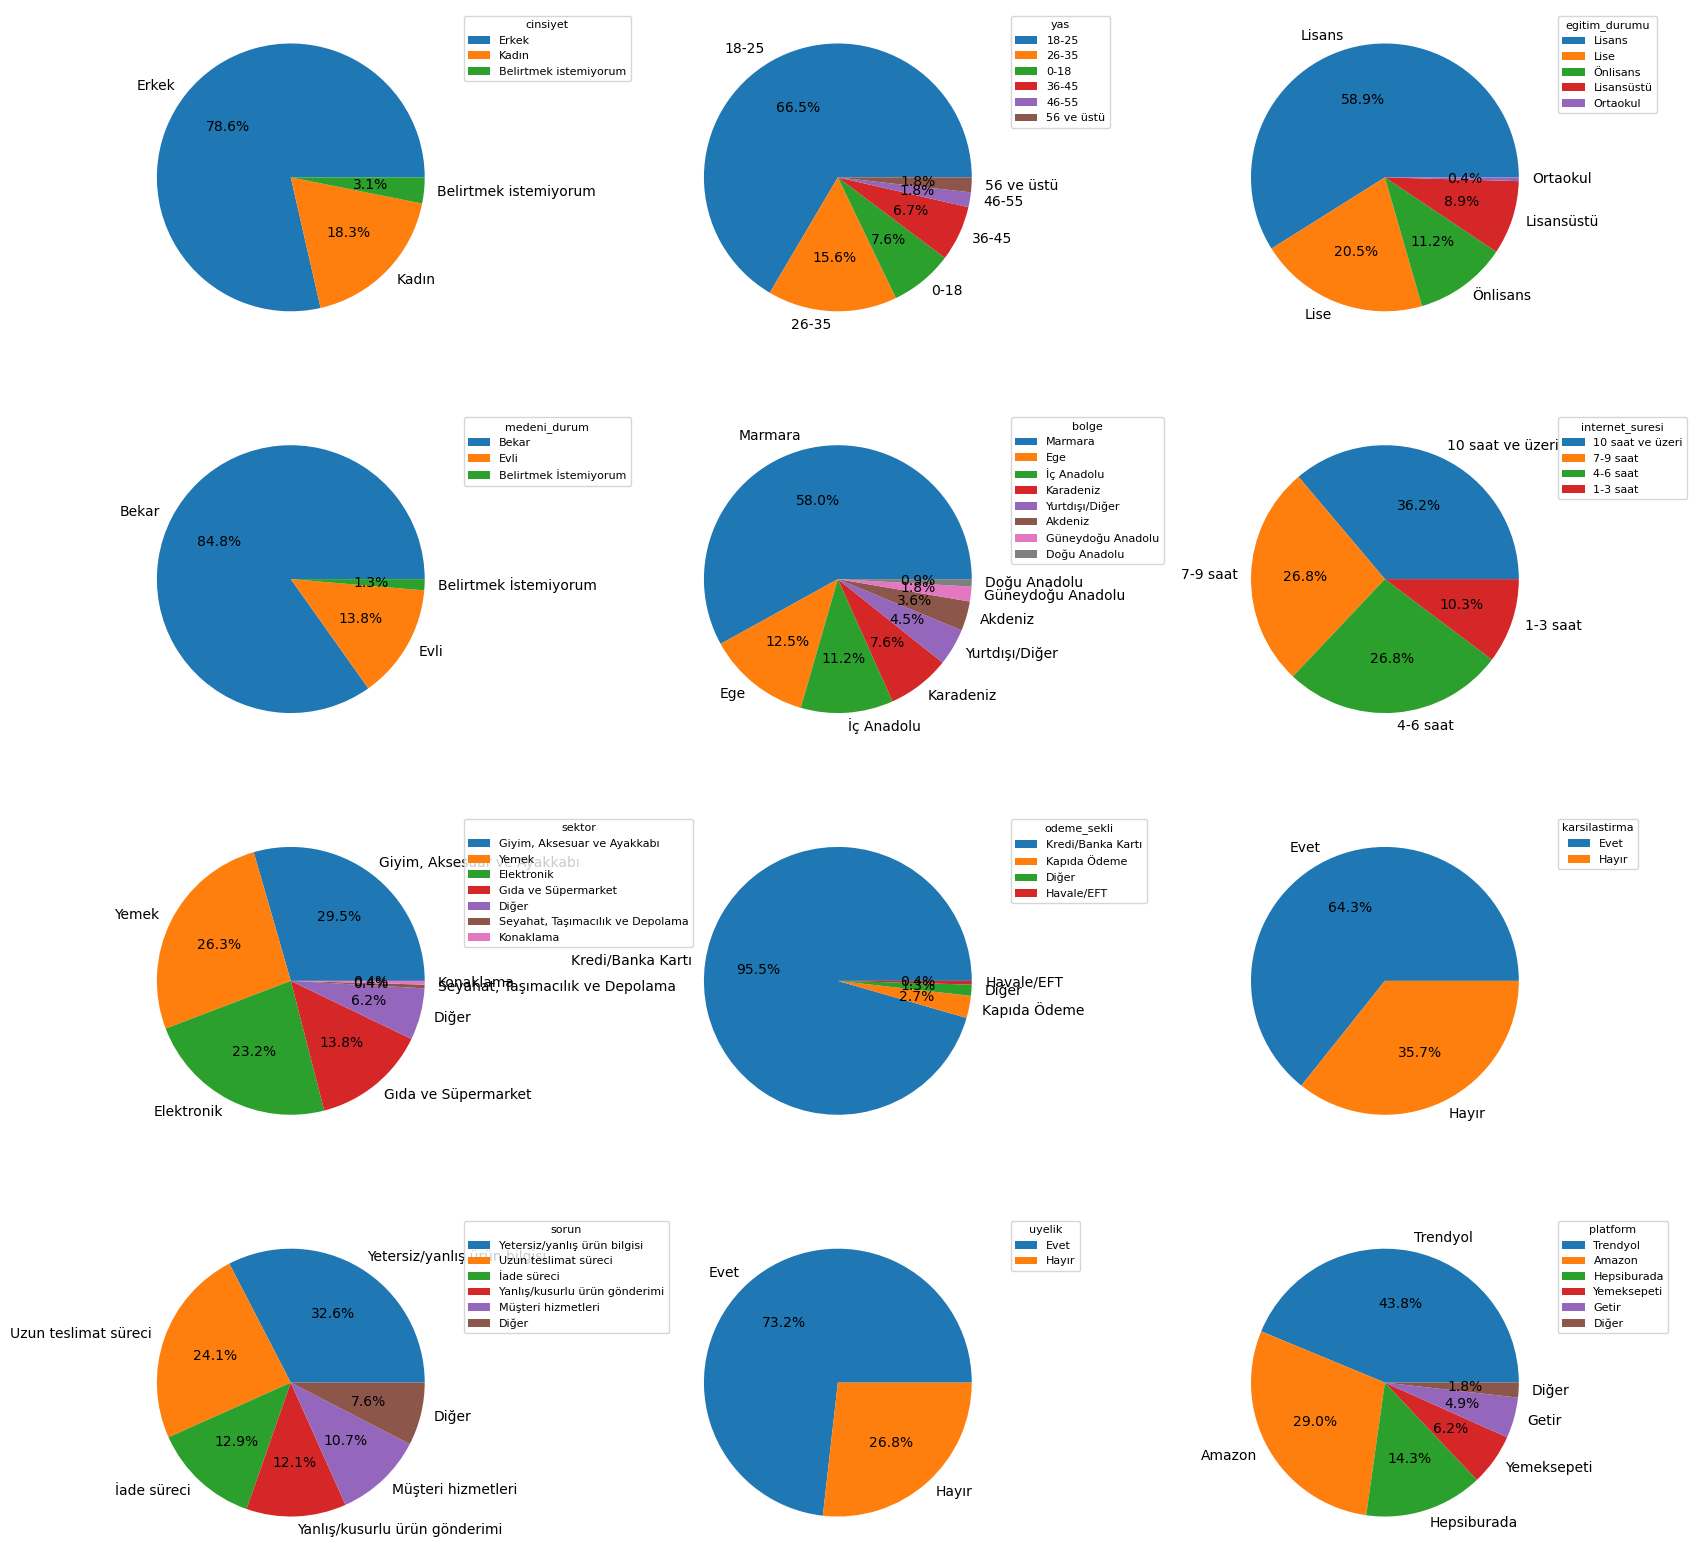

In [23]:
# columns distribution
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.pie(
        df[column].value_counts(),
        labels=df[column].value_counts().index,
        autopct="%1.1f%%",
    )
    # legend
    plt.legend(
        loc="best",
        bbox_to_anchor=(1, 1),
        ncol=1,
        title="{}".format(column),
        title_fontsize=8,
        fontsize=8,
    )
plt.show()

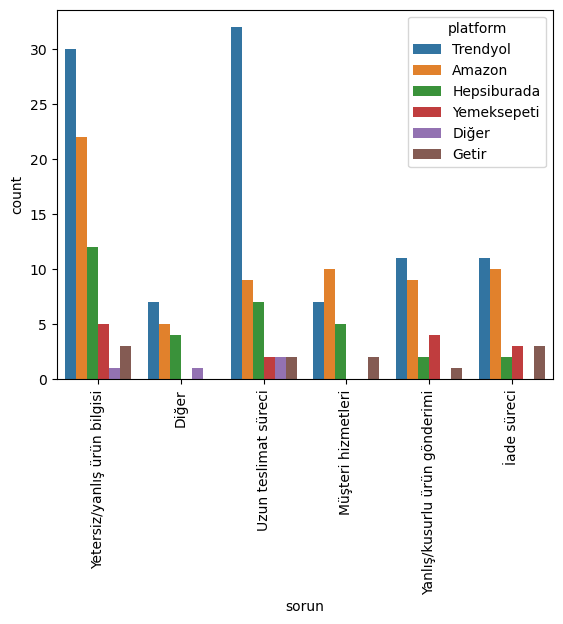

In [24]:
# sorun ve platform relation plot
plt.xticks(rotation=90)
sns.countplot(x="sorun", hue="platform", data=df)
plt.show()

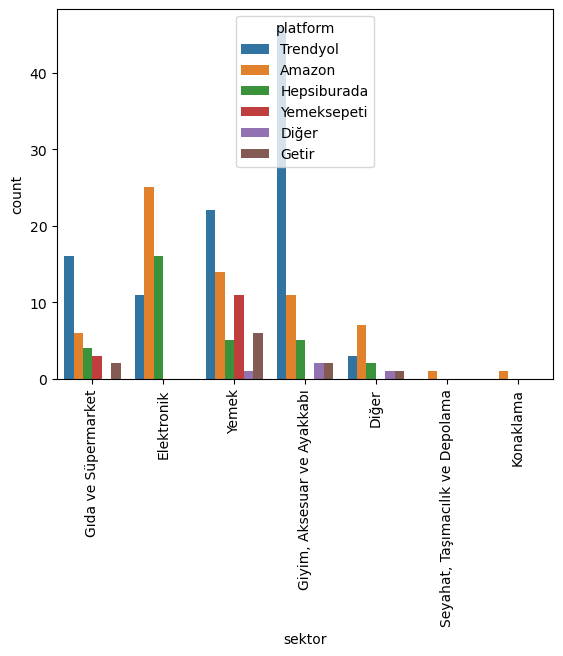

In [25]:
# sektor ve platform relation plot
plt.xticks(rotation=90)
sns.countplot(x="sektor", hue="platform", data=df)
plt.show()

In [26]:
# replace values with numbers, so we can use them in our algorithmns
df = df.replace(
    {
        "cinsiyet": {
            "Kadın": 0,
            "Erkek": 1,
            "Belirtmek istemiyorum": 2,
        },
        "yas": {
            "0-18": 0,
            "18-25": 1,
            "26-35": 2,
            "36-45": 3,
            "46-55": 4,
            "56 ve üstü": 5,
        },
        "egitim_durumu": {
            "Ortaokul": 0,
            "Lise": 1,
            "Önlisans": 2,
            "Lisans": 3,
            "Lisansüstü": 4,
            # "İlkokul": 5, # no data with this value
        },
        "medeni_durum": {
            "Evli": 0,
            "Bekar": 1,
            "Belirtmek İstemiyorum": 2,
        },
        "bolge": {
            "Marmara": 0,
            "Akdeniz": 1,
            "Karadeniz": 2,
            "Ege": 3,
            "İç Anadolu": 4,
            "Doğu Anadolu": 5,
            "Güneydoğu Anadolu": 6,
            "Yurtdışı/Diğer": 7,
        },
        "internet_suresi": {
            "1-3 saat": 0,
            "4-6 saat": 1,
            "7-9 saat": 2,
            "10 saat ve üzeri": 3,
            # "1 saatten az": 4, # no data with this value
        },
        "sektor": {
            "Gıda ve Süpermarket": 0,
            "Seyahat, Taşımacılık ve Depolama": 1,
            "Yemek": 2,
            "Konaklama": 3,
            "Elektronik": 4,
            "Giyim, Aksesuar ve Ayakkabı": 5,
            "Diğer": 6,
            # "Beyaz Eşya": 7, # no data with this value
        },
        "odeme_sekli": {
            "Kredi/Banka Kartı": 0,
            "Kapıda Ödeme": 1,
            "Havale/EFT": 2,
            "Diğer": 3,
        },
        "karsilastirma": {
            "Evet": 0,
            "Hayır": 1,
        },
        "sorun": {
            "Uzun teslimat süreci": 0,
            "İade süreci": 1,
            "Yetersiz/yanlış ürün bilgisi": 2,
            "Müşteri hizmetleri": 3,
            "Yanlış/kusurlu ürün gönderimi": 4,
            "Diğer": 5,
        },
        "uyelik": {
            "Evet": 0,
            "Hayır": 1,
        },
        "platform": {
            "Trendyol": 0,
            "Hepsiburada": 1,
            "Amazon": 2,
            "Getir": 3,
            "Yemeksepeti": 4,
            "Diğer": 5,
            # "N11": 6, # no data with this value
        },
    }
)

In [27]:
# remove "Belirtmek istemiyorum" from cinsiyet and medeni_durum
print(len(df[df.cinsiyet == 2]))
print(len(df[df.medeni_durum == 2]))
df = df[(df.cinsiyet != 2) & (df.medeni_durum != 2)]

7
3


In [28]:
# split dataset into X (feature columns) and y (target column)
X = df.drop("platform", axis=1)
y = df["platform"]

#### 10-fold cross validation of different algorithmns

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Random Forest
4. Support Vector Machine (SVM)
5. Decision Tree
6. Light Gradient Boosting Machine (LightGBM)
7. eXtreme Gradient Boosting (XGBoost)

In [29]:
# import libraries for algorithmns
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier

##### Baseline Algorithms


In [30]:
lr = LogisticRegression(random_state=42)
lr_cv = cross_val_score(lr, X, y, cv=10)
lr_default = round(lr_cv.mean(), 4) * 100
print("LogisticRegression average performance: %", lr_default)

LogisticRegression average performance: % 46.86


In [31]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv=10)
knn_default = round(knn_cv.mean(), 4) * 100
print("KNeighborsClassifier average performance: %", knn_default)

KNeighborsClassifier average performance: % 43.03


In [33]:
rf = RandomForestClassifier(random_state=42)
rf_cv = cross_val_score(rf, X, y, cv=10)
rf_default = round(rf_cv.mean(), 4) * 100
print("RandomForestClassifier average performance: %", rf_default)

RandomForestClassifier average performance: % 48.18


In [34]:
svc = SVC(random_state=42)
svc_cv = cross_val_score(svc, X, y, cv=10)
svc_default = round(svc_cv.mean(), 4) * 100
print("SVC average performance: %", svc_default)

SVC average performance: % 43.980000000000004


In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt_cv = cross_val_score(dt, X, y, cv=10)
dt_default = round(dt_cv.mean(), 4) * 100
print("DecisionTreeClassifier average performance: %", dt_default)

DecisionTreeClassifier average performance: % 43.44


In [36]:
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm_cv = cross_val_score(lgbm, X, y, cv=10)
lgbm_default = round(lgbm_cv.mean(), 4) * 100
print("LGBMClassifier average performance: %", lgbm_default)

LGBMClassifier average performance: % 45.87


In [37]:
xgb = XGBClassifier(random_state=42)
xgb_cv = cross_val_score(xgb, X, y, cv=10)
xgb_default = round(xgb_cv.mean(), 4) * 100
print("XGBClassifier average performance: %", xgb_default)

XGBClassifier average performance: % 49.5


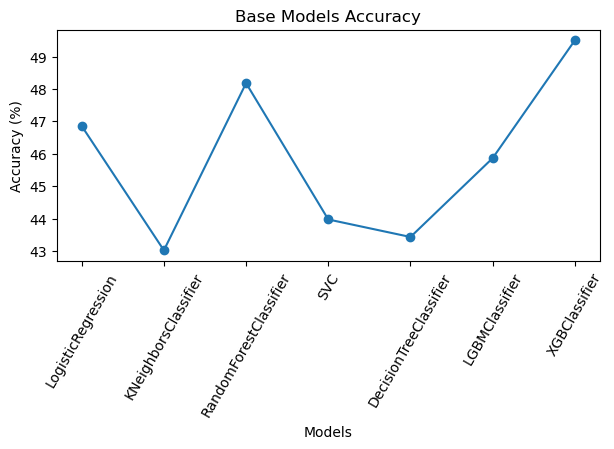

In [38]:
# plot models performance
plt.figure(figsize=(7, 3))
plt.plot(
    [
        "LogisticRegression",
        "KNeighborsClassifier",
        "RandomForestClassifier",
        "SVC",
        "DecisionTreeClassifier",
        "LGBMClassifier",
        "XGBClassifier"
    ],
    [
        lr_default,
        knn_default,
        rf_default,
        svc_default,
        dt_default,
        lgbm_default,
        xgb_default,
    ],
    marker="o",
)
plt.xticks(rotation=60)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Base Models Accuracy")
plt.show()

### Hyperparameter Tuning


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# performance reporting function for hyperparameter tuning
def clf_performance(classifier, model_name):
    print(model_name)
    print(f"Best Score: %{round(classifier.best_score_, 4) * 100}")
    print("Best Parameters: " + str(classifier.best_params_))

In [41]:
lr = LogisticRegression()
param_grid = {
    "max_iter": [100, 300, 500, 1000],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": np.logspace(-4, 4, 20, 50, 100),
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
}

clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X, y)
clf_performance(best_clf_lr, "Logistic Regression")

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Logistic Regression
Best Score: %48.25
Best Parameters: {'C': 2.6366508987303554, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [42]:
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "p": [1, 2],
    "metric": ["minkowski", "euclidean", "manhattan"],
    "leaf_size": [10, 20, 30, 40, 50],
}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X, y)
clf_performance(best_clf_knn, "KNN")

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
KNN
Best Score: %47.23
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [43]:
svc = SVC(probability=True)
param_grid = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.5, 1, 2, 5, 10], "C": [0.1, 1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [0.1, 1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4, 5], "C": [0.1, 1, 10, 100, 1000]},
]
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X, y)
clf_performance(best_clf_svc, "SVC")

Fitting 10 folds for each of 55 candidates, totalling 550 fits
SVC
Best Score: %48.64
Best Parameters: {'C': 0.1, 'degree': 5, 'kernel': 'poly'}


In [44]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [100, 200, 500],
    "bootstrap": [True, False],
    "max_depth": [5, 10, 15, None],
    "max_features": ["auto", "sqrt", 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 3, 5],
    "criterion": ["gini", "entropy"],
}

clf_rf_rnd = GridSearchCV(rf, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf_rnd.fit(X, y)
clf_performance(best_clf_rf, "Random Forest")

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits
Random Forest
Best Score: %52.839999999999996
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, 20, 25, 50, None],
    "max_features": ["auto", "sqrt", 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 3, 5],
    "max_leaf_nodes": [2, 3, 5, 10, 20, 50, None],
    "min_impurity_decrease": [0, 0.1, 0.2, 0.3, 0.4],
}

clf_dt_rnd = GridSearchCV(dt, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_dt = clf_dt_rnd.fit(X, y)
clf_performance(best_clf_dt, "Decision Tree")

Fitting 10 folds for each of 17640 candidates, totalling 176400 fits
Decision Tree
Best Score: %52.339999999999996
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [46]:
lgm = lgb.LGBMClassifier(random_state=42)
param_grid = {
    "learning_rate": [0.005, 0.01, 0.05, 0.1],
    "n_estimators": [8, 16, 24],
    "num_leaves": [6, 8, 10],
    "boosting_type": ["gbdt", "dart"],
    "objective": ["binary"],
    "max_bin": [255, 510],
    "random_state": [500],
    "colsample_bytree": [0.64, 0.65, 0.66],
    "subsample": [0.7, 0.75],
    "reg_alpha": [1, 1.2],
    "reg_lambda": [1, 1.2, 1.4],
}

clf_lgbm_rnd = GridSearchCV(
    lgm,
    param_grid=param_grid,
    cv=10,
    verbose=True,
    n_jobs=-1,
)

best_clf_lgbm = clf_lgbm_rnd.fit(X, y)
clf_performance(best_clf_lgbm, "LGBM")

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits
LGBM
Best Score: %51.9
Best Parameters: {'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.1, 'max_bin': 255, 'n_estimators': 16, 'num_leaves': 8, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1.2, 'reg_lambda': 1.4, 'subsample': 0.7}


In [47]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 500],
    "colsample_bytree": [0.75, 0.8, 0.85],
    "max_depth": [None, 1, 2, 3],
    "reg_alpha": [1],
    "reg_lambda": [2, 5, 10],
    "subsample": [0.55, 0.6, 0.65],
    "learning_rate": [0.5],
    "gamma": [0.5, 1, 2],
    "min_child_weight": [0.01],
    "sampling_method": ["uniform"],
}

clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_xgb = clf_xgb.fit(X, y)
clf_performance(best_clf_xgb, "XGB")

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
XGB
Best Score: %53.72
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.6}


```
T-value provides information about the magnitude of the difference between groups or between a sample mean and a hypothesized mean, while the p-value assesses the significance of this difference and helps make a decision about rejecting or failing to reject the null hypothesis.
```

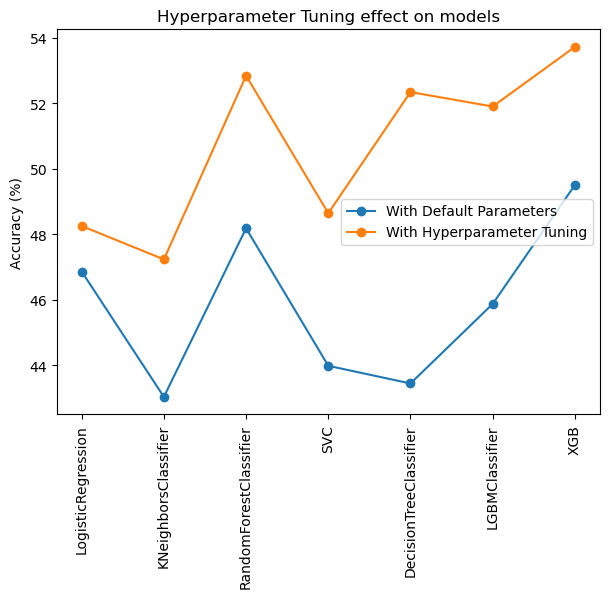

In [48]:
# plot with and without hyperparameter tuning comparison
plt.figure(figsize=(7, 5))
plt.plot(
    [
        lr_default,
        knn_default,
        rf_default,
        svc_default,
        dt_default,
        lgbm_default,
        xgb_default
    ],
    label="With Default Parameters",
    marker="o",
)
plt.plot(
    [
        round(best_clf_lr.best_score_, 4) * 100,
        round(best_clf_knn.best_score_, 4) * 100,
        round(best_clf_rf.best_score_, 4) * 100,
        round(best_clf_svc.best_score_, 4) * 100,
        round(best_clf_dt.best_score_, 4) * 100,
        round(best_clf_lgbm.best_score_, 4) * 100,
        round(best_clf_xgb.best_score_, 4) * 100,
    ],
    label="With Hyperparameter Tuning",
    marker="o",
)
plt.xticks(
    np.arange(7),
    (
        "LogisticRegression",
        "KNeighborsClassifier",
        "RandomForestClassifier",
        "SVC",
        "DecisionTreeClassifier",
        "LGBMClassifier",
        "XGB",
    ),
    rotation=90,
)
plt.title("Hyperparameter Tuning effect on models")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

In [49]:
# T-test comparison
from scipy import stats

t_value_knn, p_value_knn = stats.ttest_rel(best_clf_lr.predict(X), best_clf_knn.predict(X))
print("T-test comparison between Logistic Regression and KNN")
print("T-value: ", t_value_knn)
print("P-value: ", p_value_knn)

t_value_svc, p_value_svc = stats.ttest_rel(best_clf_lr.predict(X), best_clf_svc.predict(X))
print("T-test comparison between Logistic Regression and SVC")
print("T-value: ", t_value_svc)
print("P-value: ", p_value_svc)

t_value_rf, p_value_rf = stats.ttest_rel(best_clf_lr.predict(X), best_clf_rf.predict(X))
print("T-test comparison between Logistic Regression and Random Forest")
print("T-value: ", t_value_rf)
print("P-value: ", p_value_rf)

t_value_dt, p_value_dt = stats.ttest_rel(best_clf_lr.predict(X), best_clf_dt.predict(X))
print("T-test comparison between Logistic Regression and Decision Tree")
print("T-value: ", t_value_dt)
print("P-value: ", p_value_dt)

t_value_lgbm, p_value_lgbm = stats.ttest_rel(best_clf_lr.predict(X), best_clf_lgbm.predict(X))
print("T-test comparison between Logistic Regression and LGBM")
print("T-value: ", t_value_lgbm)
print("P-value: ", p_value_lgbm)

t_value_xgb, p_value_xgb = stats.ttest_rel(best_clf_lr.predict(X), best_clf_xgb.predict(X))
print("T-test comparison between Logistic Regression and XGB")
print("T-value: ", t_value_xgb)
print("P-value: ", p_value_xgb)


T-test comparison between Logistic Regression and KNN
T-value:  3.5102189998489535
P-value:  0.0005453619859119909
T-test comparison between Logistic Regression and SVC
T-value:  5.477946503572347
P-value:  1.1971303922632126e-07
T-test comparison between Logistic Regression and Random Forest
T-value:  -2.5639116120292247
P-value:  0.011032049648223869
T-test comparison between Logistic Regression and Decision Tree
T-value:  5.414639734457233
P-value:  1.636328482550378e-07
T-test comparison between Logistic Regression and LGBM
T-value:  4.138161275671702
P-value:  5.025240669285598e-05
T-test comparison between Logistic Regression and XGB
T-value:  5.317106667249714
P-value:  2.6351591352828806e-07


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(216, 7)


In [51]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_dt = best_clf_dt.best_estimator_
best_lgbm = best_clf_lgbm.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

In [52]:
lr_cv = cross_val_score(best_lr, X_pca, y, cv=10)
knn_cv = cross_val_score(best_knn, X_pca, y, cv=10)
rf_cv = cross_val_score(best_rf, X_pca, y, cv=10)
svc_cv = cross_val_score(best_svc, X_pca, y, cv=10)
dt_cv = cross_val_score(best_dt, X_pca, y, cv=10)
lgbm_cv = cross_val_score(best_lgbm, X_pca, y, cv=10)
xgb_cv = cross_val_score(best_xgb, X_pca, y, cv=10)

# results
print(
    "LogisticRegression average performance with PCA: %", round(lr_cv.mean(), 4) * 100
)
print(
    "KNeighborsClassifier average performance with PCA: %",
    round(knn_cv.mean(), 4) * 100,
)
print(
    "RandomForestClassifier average performance with PCA: %",
    round(rf_cv.mean(), 4) * 100,
)
print("SVC average performance with PCA: %", round(svc_cv.mean(), 4) * 100)
print(
    "DecisionTreeClassifier average performance with PCA: %",
    round(dt_cv.mean(), 4) * 100,
)
print(
    "LGBMClassifier average performance with PCA: %",
    round(lgbm_cv.mean(), 4) * 100,
)
print("XGB average performance with PCA: %", round(xgb_cv.mean(), 4) * 100)

LogisticRegression average performance with PCA: % 44.98
KNeighborsClassifier average performance with PCA: % 42.01
RandomForestClassifier average performance with PCA: % 48.64
SVC average performance with PCA: % 44.89
DecisionTreeClassifier average performance with PCA: % 43.51
LGBMClassifier average performance with PCA: % 48.230000000000004
XGB average performance with PCA: % 47.75


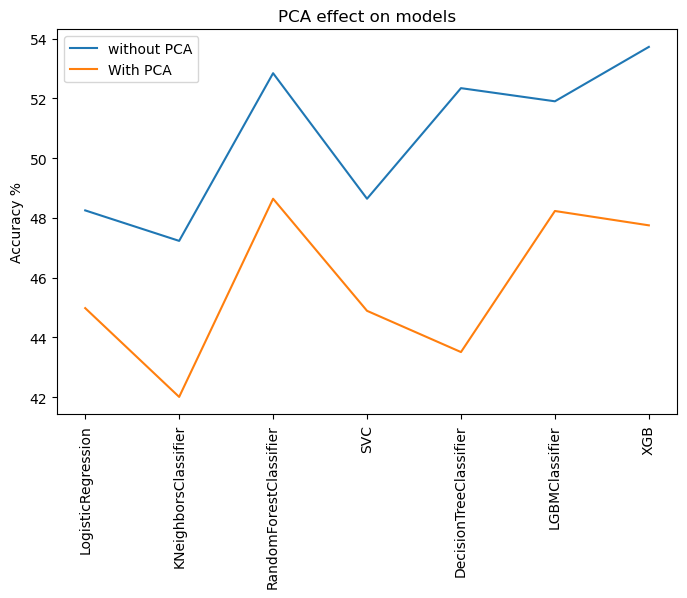

In [53]:
# with and without PCA comparison
plt.figure(figsize=(8, 5))
plt.plot(
    [
        round(best_clf_lr.best_score_, 4) * 100,
        round(best_clf_knn.best_score_, 4) * 100,
        round(best_clf_rf.best_score_, 4) * 100,
        round(best_clf_svc.best_score_, 4) * 100,
        round(best_clf_dt.best_score_, 4) * 100,
        round(best_clf_lgbm.best_score_, 4) * 100,
        round(best_clf_xgb.best_score_, 4) * 100
    ],
    label="without PCA",
)
plt.plot(
    [
        round(lr_cv.mean(), 4) * 100,
        round(knn_cv.mean(), 4) * 100,
        round(rf_cv.mean(), 4) * 100,
        round(svc_cv.mean(), 4) * 100,
        round(dt_cv.mean(), 4) * 100,
        round(lgbm_cv.mean(), 4) * 100,
        round(xgb_cv.mean(), 4) * 100,
    ],
    label="With PCA",
)
plt.xticks(
    np.arange(7),
    (
        "LogisticRegression",
        "KNeighborsClassifier",
        "RandomForestClassifier",
        "SVC",
        "DecisionTreeClassifier",
        "LGBMClassifier",
        "XGB",
    ),
    rotation=90,
)
plt.title("PCA effect on models")
plt.ylabel("Accuracy %")
plt.legend()
plt.show()

#### Feature Importance/Selection


<AxesSubplot:>

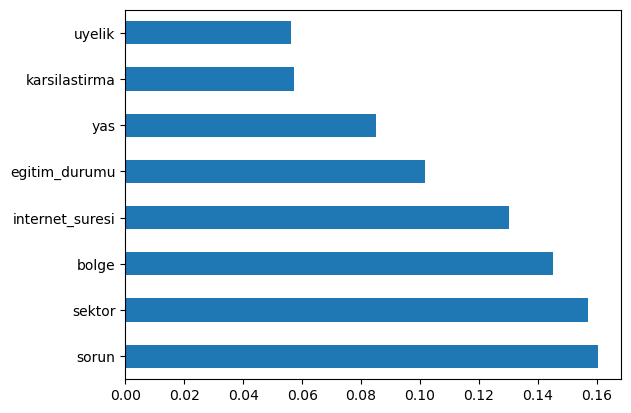

In [54]:
best_rf = best_clf_rf.best_estimator_.fit(X, y)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind="barh")

In [55]:
# use only important features for models
important_features = feat_importances.nlargest(8)
important_features.index

Index(['sorun', 'sektor', 'bolge', 'internet_suresi', 'egitim_durumu', 'yas',
       'karsilastirma', 'uyelik'],
      dtype='object')

In [56]:
# drop unimportant features
X_important = df.drop("platform", axis=1).loc[:, important_features.index]

In [57]:
lr = LogisticRegression(random_state=42)
cv = cross_val_score(best_lr, X_important, y, cv=10)
lr_with_important_features = round(cv.mean(), 4) * 100
print("LogisticRegression average performance: %", lr_with_important_features)

LogisticRegression average performance: % 45.39


In [58]:
knn = KNeighborsClassifier()
cv = cross_val_score(best_knn, X_important, y, cv=10)
knn_with_important_features = round(cv.mean(), 4) * 100
print("KNeighborsClassifier average performance: %", knn_with_important_features)

KNeighborsClassifier average performance: % 47.68


In [59]:
rf = RandomForestClassifier(random_state=42)
cv = cross_val_score(best_rf, X_important, y, cv=10)
rf_with_important_features = round(cv.mean(), 4) * 100
print("RandomForestClassifier average performance: %", rf_with_important_features)

RandomForestClassifier average performance: % 49.980000000000004


In [60]:
svc = SVC(random_state=42)
cv = cross_val_score(best_svc, X_important, y, cv=10)
svc_with_important_features = round(cv.mean(), 4) * 100
print("SVC average performance: %", svc_with_important_features)

SVC average performance: % 43.53


In [61]:
dt = DecisionTreeClassifier(random_state=42)
cv = cross_val_score(best_dt, X_important, y, cv=10)
dt_with_important_features = round(cv.mean(), 4) * 100
print("DecisionTreeClassifier average performance: %", dt_with_important_features)

DecisionTreeClassifier average performance: % 50.03999999999999


In [62]:
lgbm = lgb.LGBMClassifier(random_state=42)
cv = cross_val_score(best_lgbm, X_important, y, cv=10)
lgbm_with_important_features = round(cv.mean(), 4) * 100
print("LGBMClassifier average performance: %", lgbm_with_important_features)

LGBMClassifier average performance: % 49.11


In [63]:
xgb = XGBClassifier(random_state=42)
cv = cross_val_score(best_xgb, X_important, y, cv=10)
xgb_with_important_features = round(cv.mean(), 4) * 100
print("XGBClassifier average performance: %", xgb_with_important_features)

XGBClassifier average performance: % 50.480000000000004


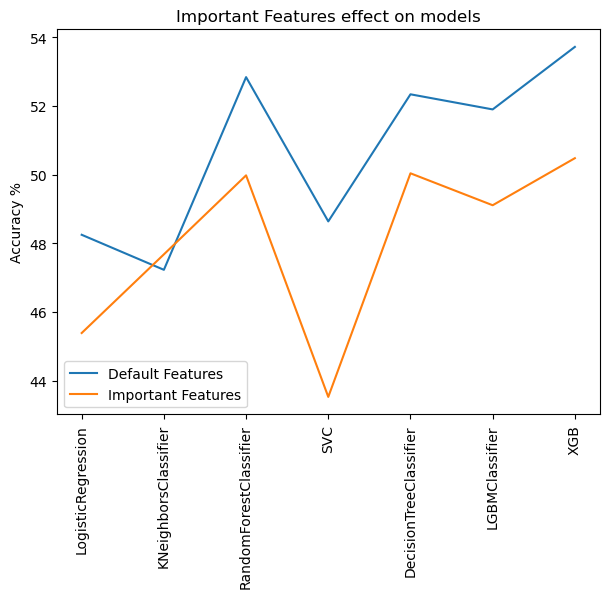

In [64]:
# plot with and without important features comparison
plt.figure(figsize=(7, 5))
plt.plot(
    [
        round(best_clf_lr.best_score_, 4) * 100,
        round(best_clf_knn.best_score_, 4) * 100,
        round(best_clf_rf.best_score_, 4) * 100,
        round(best_clf_svc.best_score_, 4) * 100,
        round(best_clf_dt.best_score_, 4) * 100,
        round(best_clf_lgbm.best_score_, 4) * 100,
        round(best_clf_xgb.best_score_, 4) * 100
    ],
    label="Default Features",
)
plt.plot(
    [
        lr_with_important_features,
        knn_with_important_features,
        rf_with_important_features,
        svc_with_important_features,
        dt_with_important_features,
        lgbm_with_important_features,
        xgb_with_important_features,
    ],
    label="Important Features",
)
plt.xticks(
    np.arange(7),
    (
        "LogisticRegression",
        "KNeighborsClassifier",
        "RandomForestClassifier",
        "SVC",
        "DecisionTreeClassifier",
        "LGBMClassifier",
        "XGB",
    ),
    rotation=90,
)
plt.title("Important Features effect on models")
plt.ylabel("Accuracy %")
plt.legend()
plt.show()


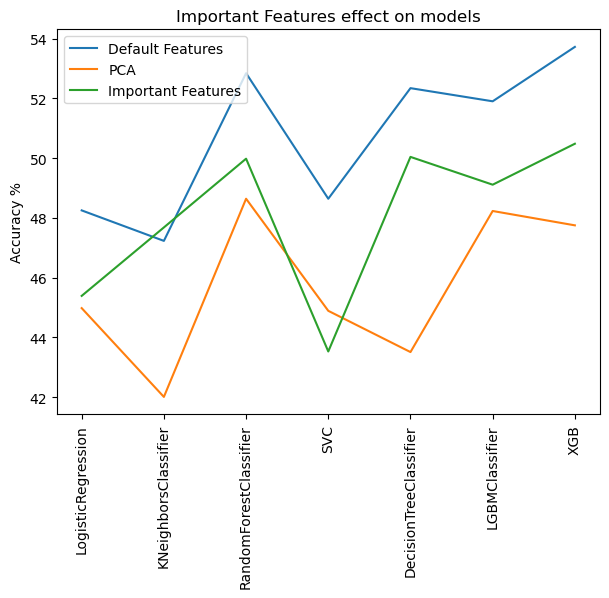

In [65]:
# plot pca, important features and default features comparison
plt.figure(figsize=(7, 5))
plt.plot(
    [
        round(best_clf_lr.best_score_, 4) * 100,
        round(best_clf_knn.best_score_, 4) * 100,
        round(best_clf_rf.best_score_, 4) * 100,
        round(best_clf_svc.best_score_, 4) * 100,
        round(best_clf_dt.best_score_, 4) * 100,
        round(best_clf_lgbm.best_score_, 4) * 100,
        round(best_clf_xgb.best_score_, 4) * 100
    ],
    label="Default Features",
)
plt.plot(
    [
        round(lr_cv.mean(), 4) * 100,
        round(knn_cv.mean(), 4) * 100,
        round(rf_cv.mean(), 4) * 100,
        round(svc_cv.mean(), 4) * 100,
        round(dt_cv.mean(), 4) * 100,
        round(lgbm_cv.mean(), 4) * 100,
        round(xgb_cv.mean(), 4) * 100,
    ],
    label="PCA",
)
plt.plot(
    [
        lr_with_important_features,
        knn_with_important_features,
        rf_with_important_features,
        svc_with_important_features,
        dt_with_important_features,
        lgbm_with_important_features,
        xgb_with_important_features,
    ],
    label="Important Features",
)
plt.xticks(
    np.arange(7),
    (
        "LogisticRegression",
        "KNeighborsClassifier",
        "RandomForestClassifier",
        "SVC",
        "DecisionTreeClassifier",
        "LGBMClassifier",
        "XGB",
    ),
    rotation=90,
)
plt.title("Important Features effect on models")
plt.ylabel("Accuracy %")
plt.legend()
plt.show()